In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

from planet import *

In [3]:
PATH = "data/planet_amazon/"

In [5]:
sz = 64
bs = 64
arch = resnet34
metrics = [f2]

In [8]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [10]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    data = ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, bs=bs, tfms=tfms, val_idxs=val_idxs,
                                        suffix='.jpg', test_name='test-jpg')
    return data

In [ ]:
def plot_loss_change(sched, sma=1, n_skip=20, y_lim=(-0.01,0.01)):
    """
    Plots rate of change of the loss function.
    Parameters:
        sched - learning rate scheduler, an instance of LR_Finder class.
        sma - number of batches for simple moving average to smooth out the curve.
        n_skip - number of batches to skip on the left.
        y_lim - limits for the y axis.
    """
    derivatives = [0] * (sma + 1)
    for i in range(1 + sma, len(learn.sched.lrs)):
        derivative = (learn.sched.losses[i] - learn.sched.losses[i - sma]) / sma
        derivatives.append(derivative)
        
    plt.ylabel("d/loss")
    plt.xlabel("learning rate (log scale)")
    plt.plot(learn.sched.lrs[n_skip:], derivatives[n_skip:])
    plt.xscale('log')
    plt.ylim(y_lim)

In [11]:
data = get_data(sz,bs)

In [13]:
learn = ConvLearner.pretrained(arch, data, metrics=metrics)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.21732  0.35846  0.77345]                        



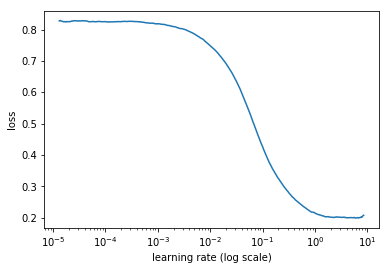

In [14]:
lrf = learn.lr_find()
# learn.sched.plot()
plot_loss_change(learn.sched, sma=20, y_lim=(-0.1, 0.01))

In [17]:
lr = 0.2
lrs = np.array([lr/9, lr/3, lr])

In [18]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.14724  0.13277  0.88232]                        
[ 1.       0.13918  0.12658  0.88788]                        
[ 2.       0.13138  0.1245   0.89126]                        
[ 3.       0.13626  0.12466  0.89011]                        
[ 4.       0.13033  0.12137  0.89436]                        
[ 5.       0.12836  0.12044  0.89563]                        
[ 6.       0.1281   0.12099  0.89457]                        



In [20]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.1181   0.10725  0.90913]                        
[ 1.       0.10926  0.10291  0.91178]                        
[ 2.       0.10156  0.0999   0.91446]                        
[ 3.       0.10636  0.10526  0.90941]                        
[ 4.       0.10004  0.09942  0.91397]                         
[ 5.       0.09612  0.09588  0.91813]                         
[ 6.       0.0949   0.09599  0.91767]                         



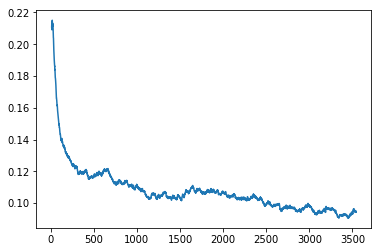

In [22]:
learn.sched.plot_loss()

In [24]:
sz = 128
learn.set_data(get_data(sz, bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [27]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.09268  0.08849  0.92644]                         
[ 1.       0.09038  0.08995  0.9232 ]                         
[ 2.       0.08557  0.0874   0.92474]                         
[ 3.       0.0913   0.08986  0.92273]                         
[ 4.       0.08991  0.08811  0.92543]                         
[ 5.       0.08423  0.0877   0.92557]                         
[ 6.       0.08083  0.08691  0.92612]                         



In [28]:
sz = 256
learn.set_data(get_data(sz,bs))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.08893  0.09297  0.92043]                         
[ 1.       0.08733  0.09191  0.92223]                         
[ 2.       0.08794  0.09117  0.92319]                         
[ 3.       0.08826  0.09124  0.92205]                         
[ 4.       0.08875  0.09113  0.92236]                         
[ 5.       0.08479  0.09093  0.9231 ]                         
[ 6.       0.08687  0.09047  0.92316]                         



In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

In [ ]:
preds = learn.TTA(is_test=True)

In [ ]:
res = [" ".join(data.classes[np.where(x > 0.2)]) for x in preds[0]]